<a href="https://colab.research.google.com/github/AyushiKashyapp/NLP/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My partner and I were on the...
1,Not Verified | We had a Premium Economy retur...
2,✅ Trip Verified | I should like to review my ...
3,✅ Trip Verified | We have flown with British A...
4,✅ Trip Verified | I sat in the plane at Vienna...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,"Not Verified | British Airways is always late,..."
1,✅ Trip Verified | Flew from Amman to London on...
2,✅ Trip Verified | This is the worst experience...
3,✅ Trip Verified | Flying LHR T5 to CPT Novemb...
4,Not Verified | Worst experience ever. Outbound...
...,...
995,✅ Trip Verified | Very full flight on G-BNLP/B...
996,✅ Trip Verified | Warsaw to London. WAW is not...
997,✅ Trip Verified | I booked my flight with Cat...
998,✅ Trip Verified | Flew British Airways from Li...


Removing the parts before | in the reviews column

First, the review string will split at '|', then we will select the second part of split at index [1], which is the review.

In [4]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [5]:
df

,reviews
0,My partner and I were on the BA2166 return fl...
1,We had a Premium Economy return flight Los A...
2,I should like to review my flight with Briti...
3,We have flown with British Airways a few time...
4,I sat in the plane at Vienna airport for thre...
...,...
995,London to Aberdeen. Before boarding the flig...
996,"Gatwick to Dubrovnik. Overcrowded lounges, b..."
997,I paid an extra £500 for two Premium economy...
998,Faro to Heathrow. Flight was very good no is...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

Importing re module which supports the regular expression.

Defining a function clean, and using re.sub to replace all the special characters and numericals leaving the alphabets in the 'text'.

Applying the 'clean' function to each element of the review column.

In [6]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...
1,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...
2,I should like to review my flight with Briti...,I should like to review my flight with Britis...
3,We have flown with British Airways a few time...,We have flown with British Airways a few time...
4,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.



```
NLTK is a leading platform for building Python programs to work with human language data.

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [7]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary: Mapping the first character of POS tag to the corresponding POS constant.
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text)) #tokenize the input text and apply POS tagging
    #print(tags)
    newlist = []
    for word, tag in tags: #iterate over each token and its tag
        if word.lower() not in set(stopwords.words('english')): #Check if the token is not a stop word
          newlist.append(tuple([word, pos_dict.get(tag[0])])) #Add the token and its POS tag to the list, mapping the tag to POS constant.
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ..."
1,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli..."
2,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British..."
3,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time..."
4,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ..."


In [9]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " " #Store lemmatized words
    for word, pos in pos_data: #Iterate over each word and its POS tag.
     if not pos: #Check if it is not a POS tag.
        lemma = word #If POS tag is None, the word remains unchanged.
        lemma_rew = lemma_rew + " " + lemma  #Append the lemma to string of lemmatized words.
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos) #Lemmatize the words using its POS tags.
        lemma_rew = lemma_rew + " " + lemma #Append the lemma to string of lemmatized words.
    return lemma_rew #Return the string of lemmatized words.

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ...",partner BA return flight Tampa Gatwick excit...
1,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...
2,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...
3,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...
4,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ...",sit plane Vienna airport three hour take arr...


In [10]:
df[['reviews','Lemma']]

,reviews,Lemma
0,My partner and I were on the BA2166 return fl...,partner BA return flight Tampa Gatwick excit...
1,We had a Premium Economy return flight Los A...,Premium Economy return flight Los Angeles Lo...
2,I should like to review my flight with Briti...,like review flight British Airways Hannover ...
3,We have flown with British Airways a few time...,fly British Airways time last trip far bad e...
4,I sat in the plane at Vienna airport for thre...,sit plane Vienna airport three hour take arr...
...,...,...
995,London to Aberdeen. Before boarding the flig...,London Aberdeen board flight force check bag...
996,"Gatwick to Dubrovnik. Overcrowded lounges, b...",Gatwick Dubrovnik Overcrowded lounge busines...
997,I paid an extra £500 for two Premium economy...,pay extra two Premium economy seat long haul...
998,Faro to Heathrow. Flight was very good no is...,Faro Heathrow Flight good issue yet baggage ...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [11]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review) #Computes the polarity score of the review text
    return vs['compound'] #Returns the compund score betwwen -1 (extremely negative) and +1 (extremely positive).

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis) #column Sentiment with the compound sentiment scores.

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ...",partner BA return flight Tampa Gatwick excit...,0.8107,Positive
1,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...,-0.3538,Negative
2,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...,0.9867,Positive
3,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...,0.1531,Neutral
4,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ...",sit plane Vienna airport three hour take arr...,0.0000,Neutral


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    472
Negative    418
Neutral     110
Name: count, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7b8d7ea27340>,
 [Text(0.09663630635705908, 1.0957469709260732, 'Positive'),
  Text(-0.46209424368082136, -0.998232893646092, 'Negative'),
  Text(1.2701890817596613, -0.4572960710289875, 'Neutral')],
 [Text(0.05271071255839586, 0.5976801659596762, '47.2%'),
  Text(-0.25205140564408435, -0.5444906692615047, '41.8%'),
  Text(0.7997486811079348, -0.28792715583306616, '11.0%')])

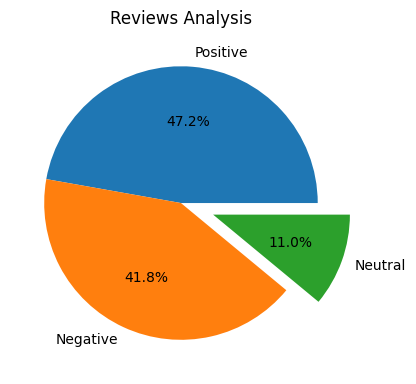

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

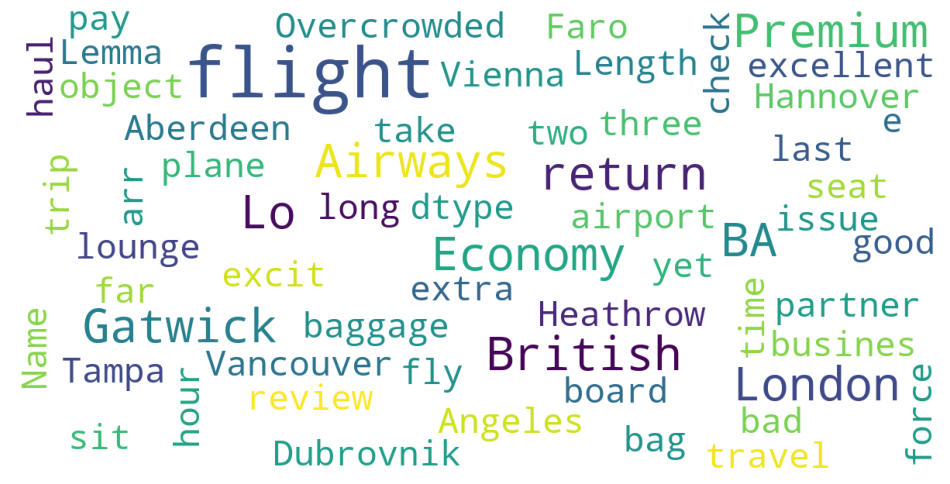

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)